In [1]:
import numpy as np
from credo import load_from_file
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

[ 18  23  59 ... 237  15 175]


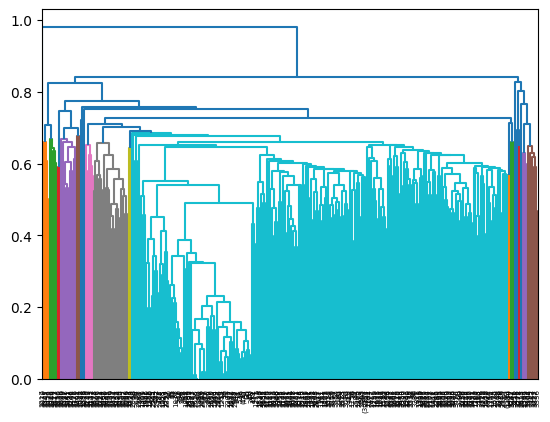

In [19]:
from credo import load_data

(x_train, y_train), (x_test, y_test) = load_data(use_worms=True, use_dots=False, use_tracks=True, cut_to_mnist=False)

distance = load_from_file('cache/new_tracks_worms_match.dat')
distance += 10**(-10)*2
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(affinity="precomputed", linkage='average',
                                     distance_threshold=0.45, n_clusters=None).fit(distance)
print(clustering.labels_)

#clustering = load_from_file('cache/dots_clusters.dat')

plot_dendrogram(clustering, truncate_mode="level", p=30)

tracks 143 z 3066 (4 %)


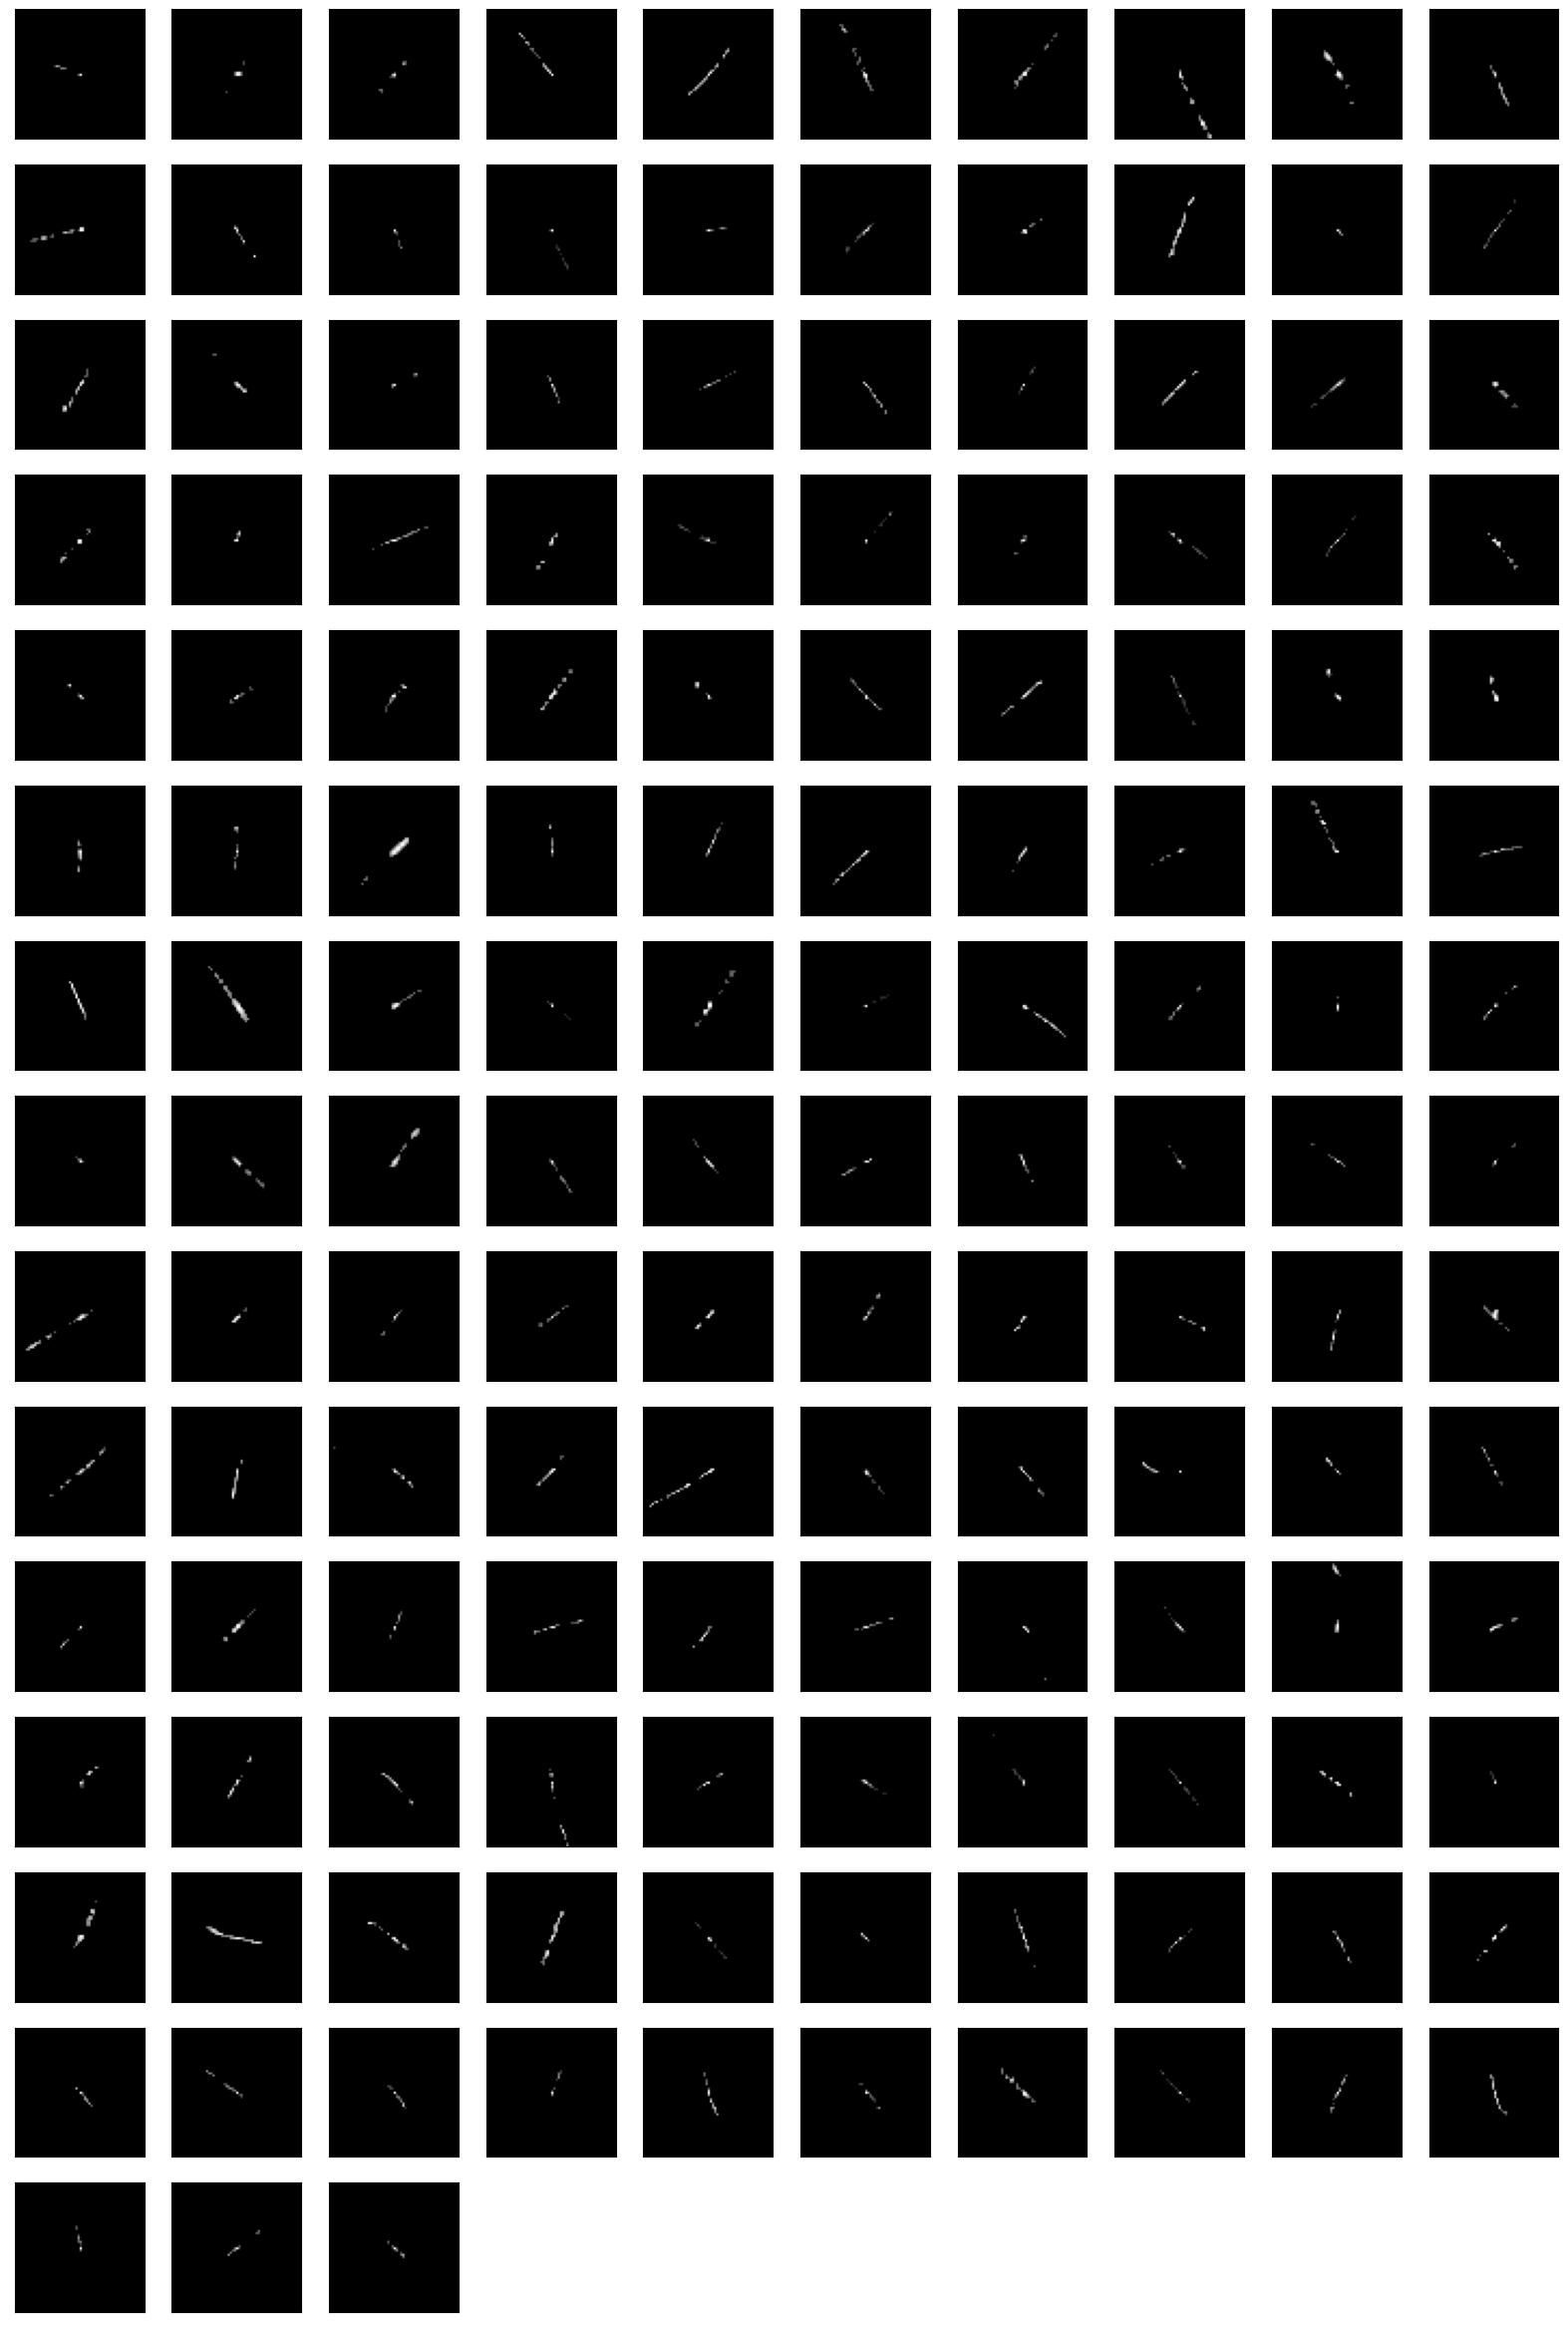

worms 148 z 495 (29 %)


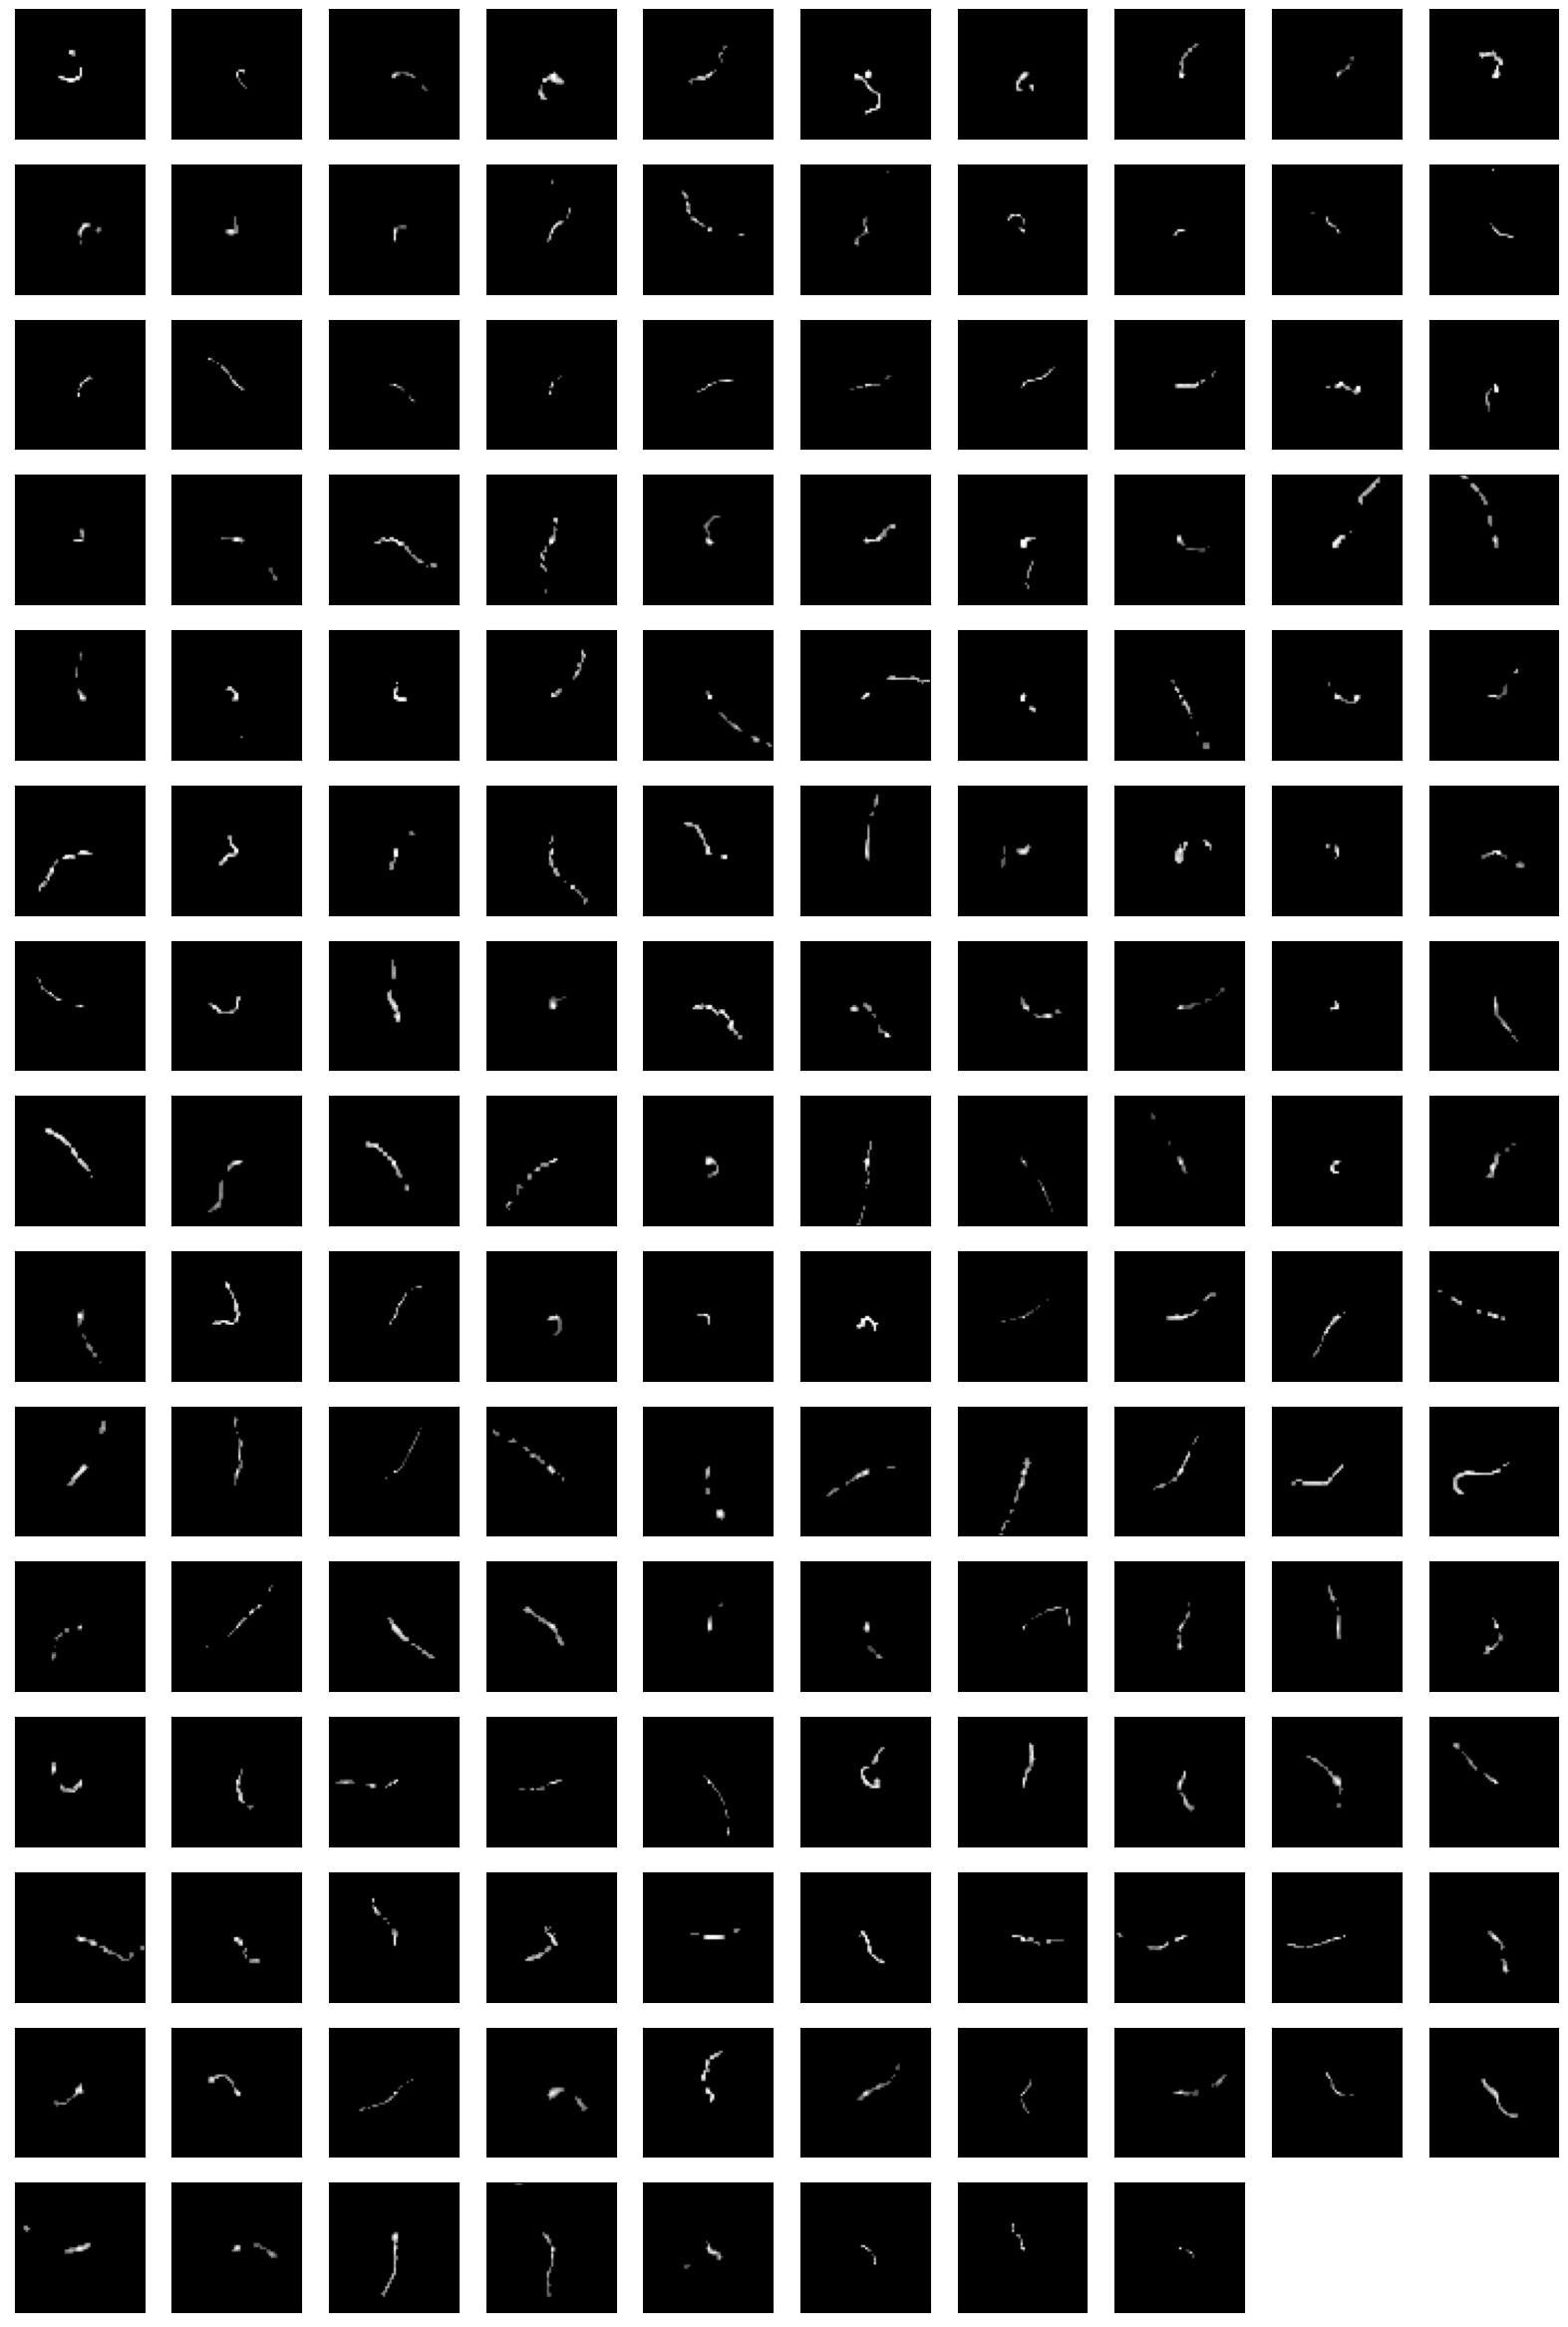

tracks_norm


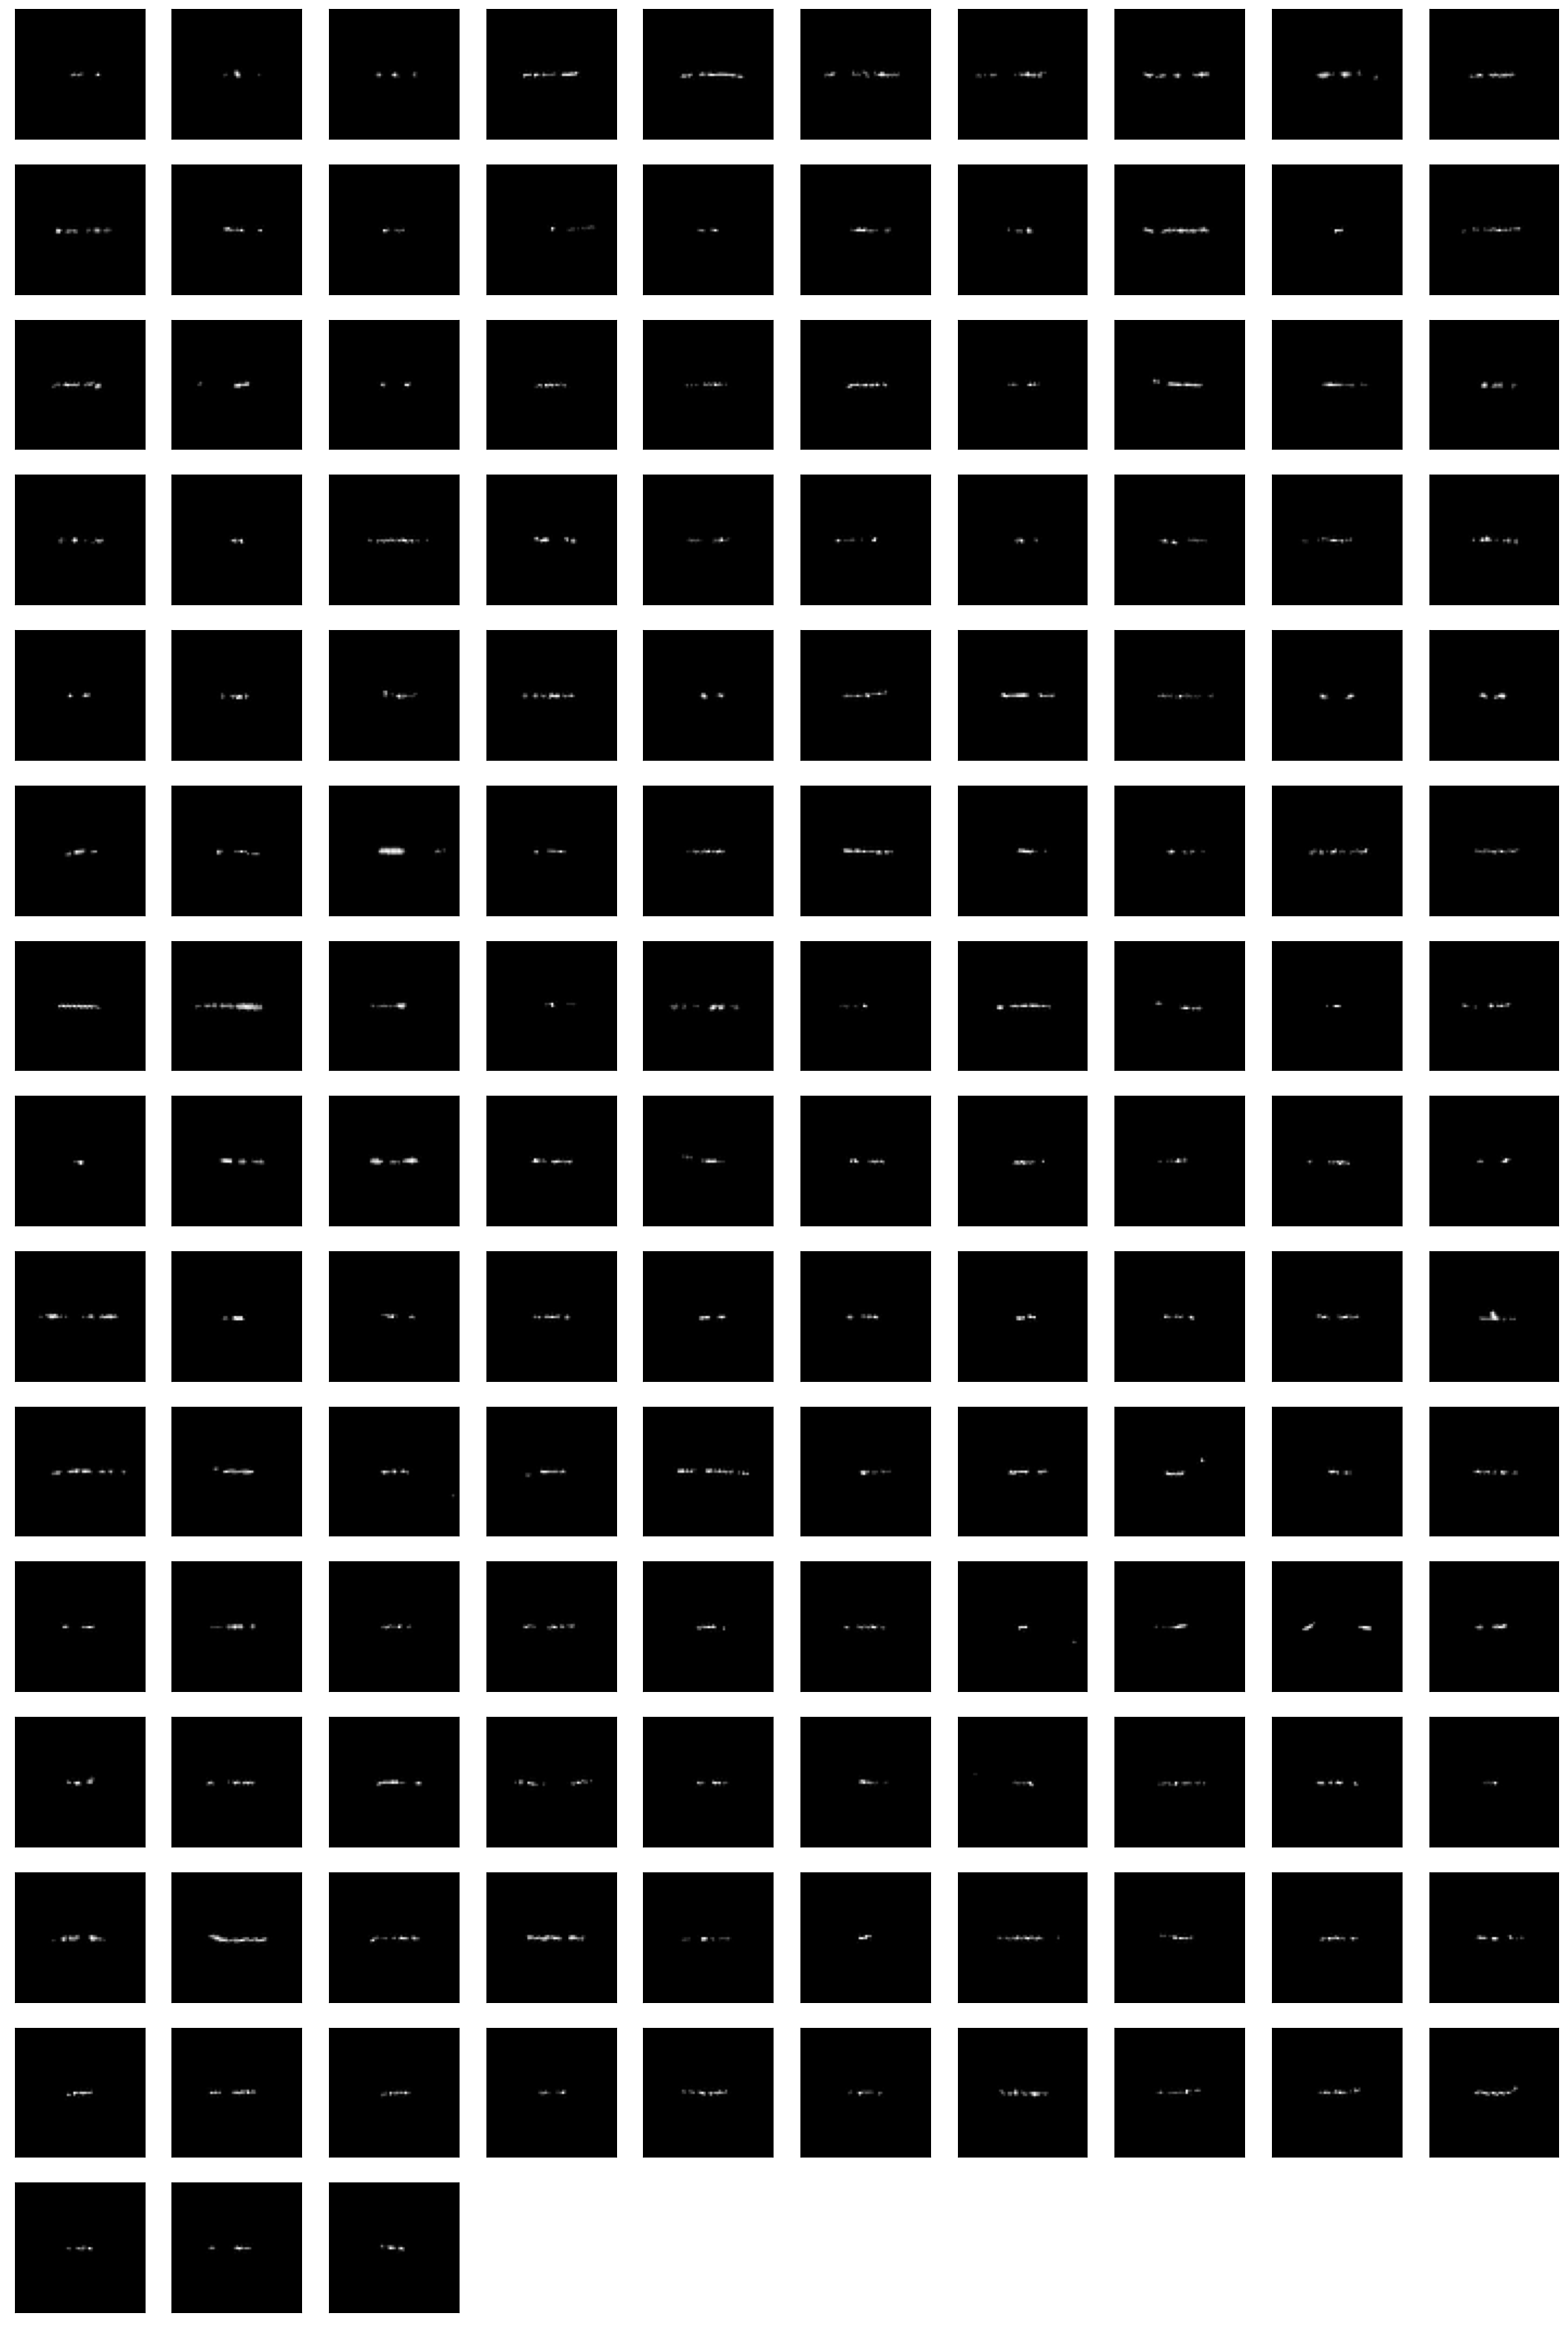

worms_norm


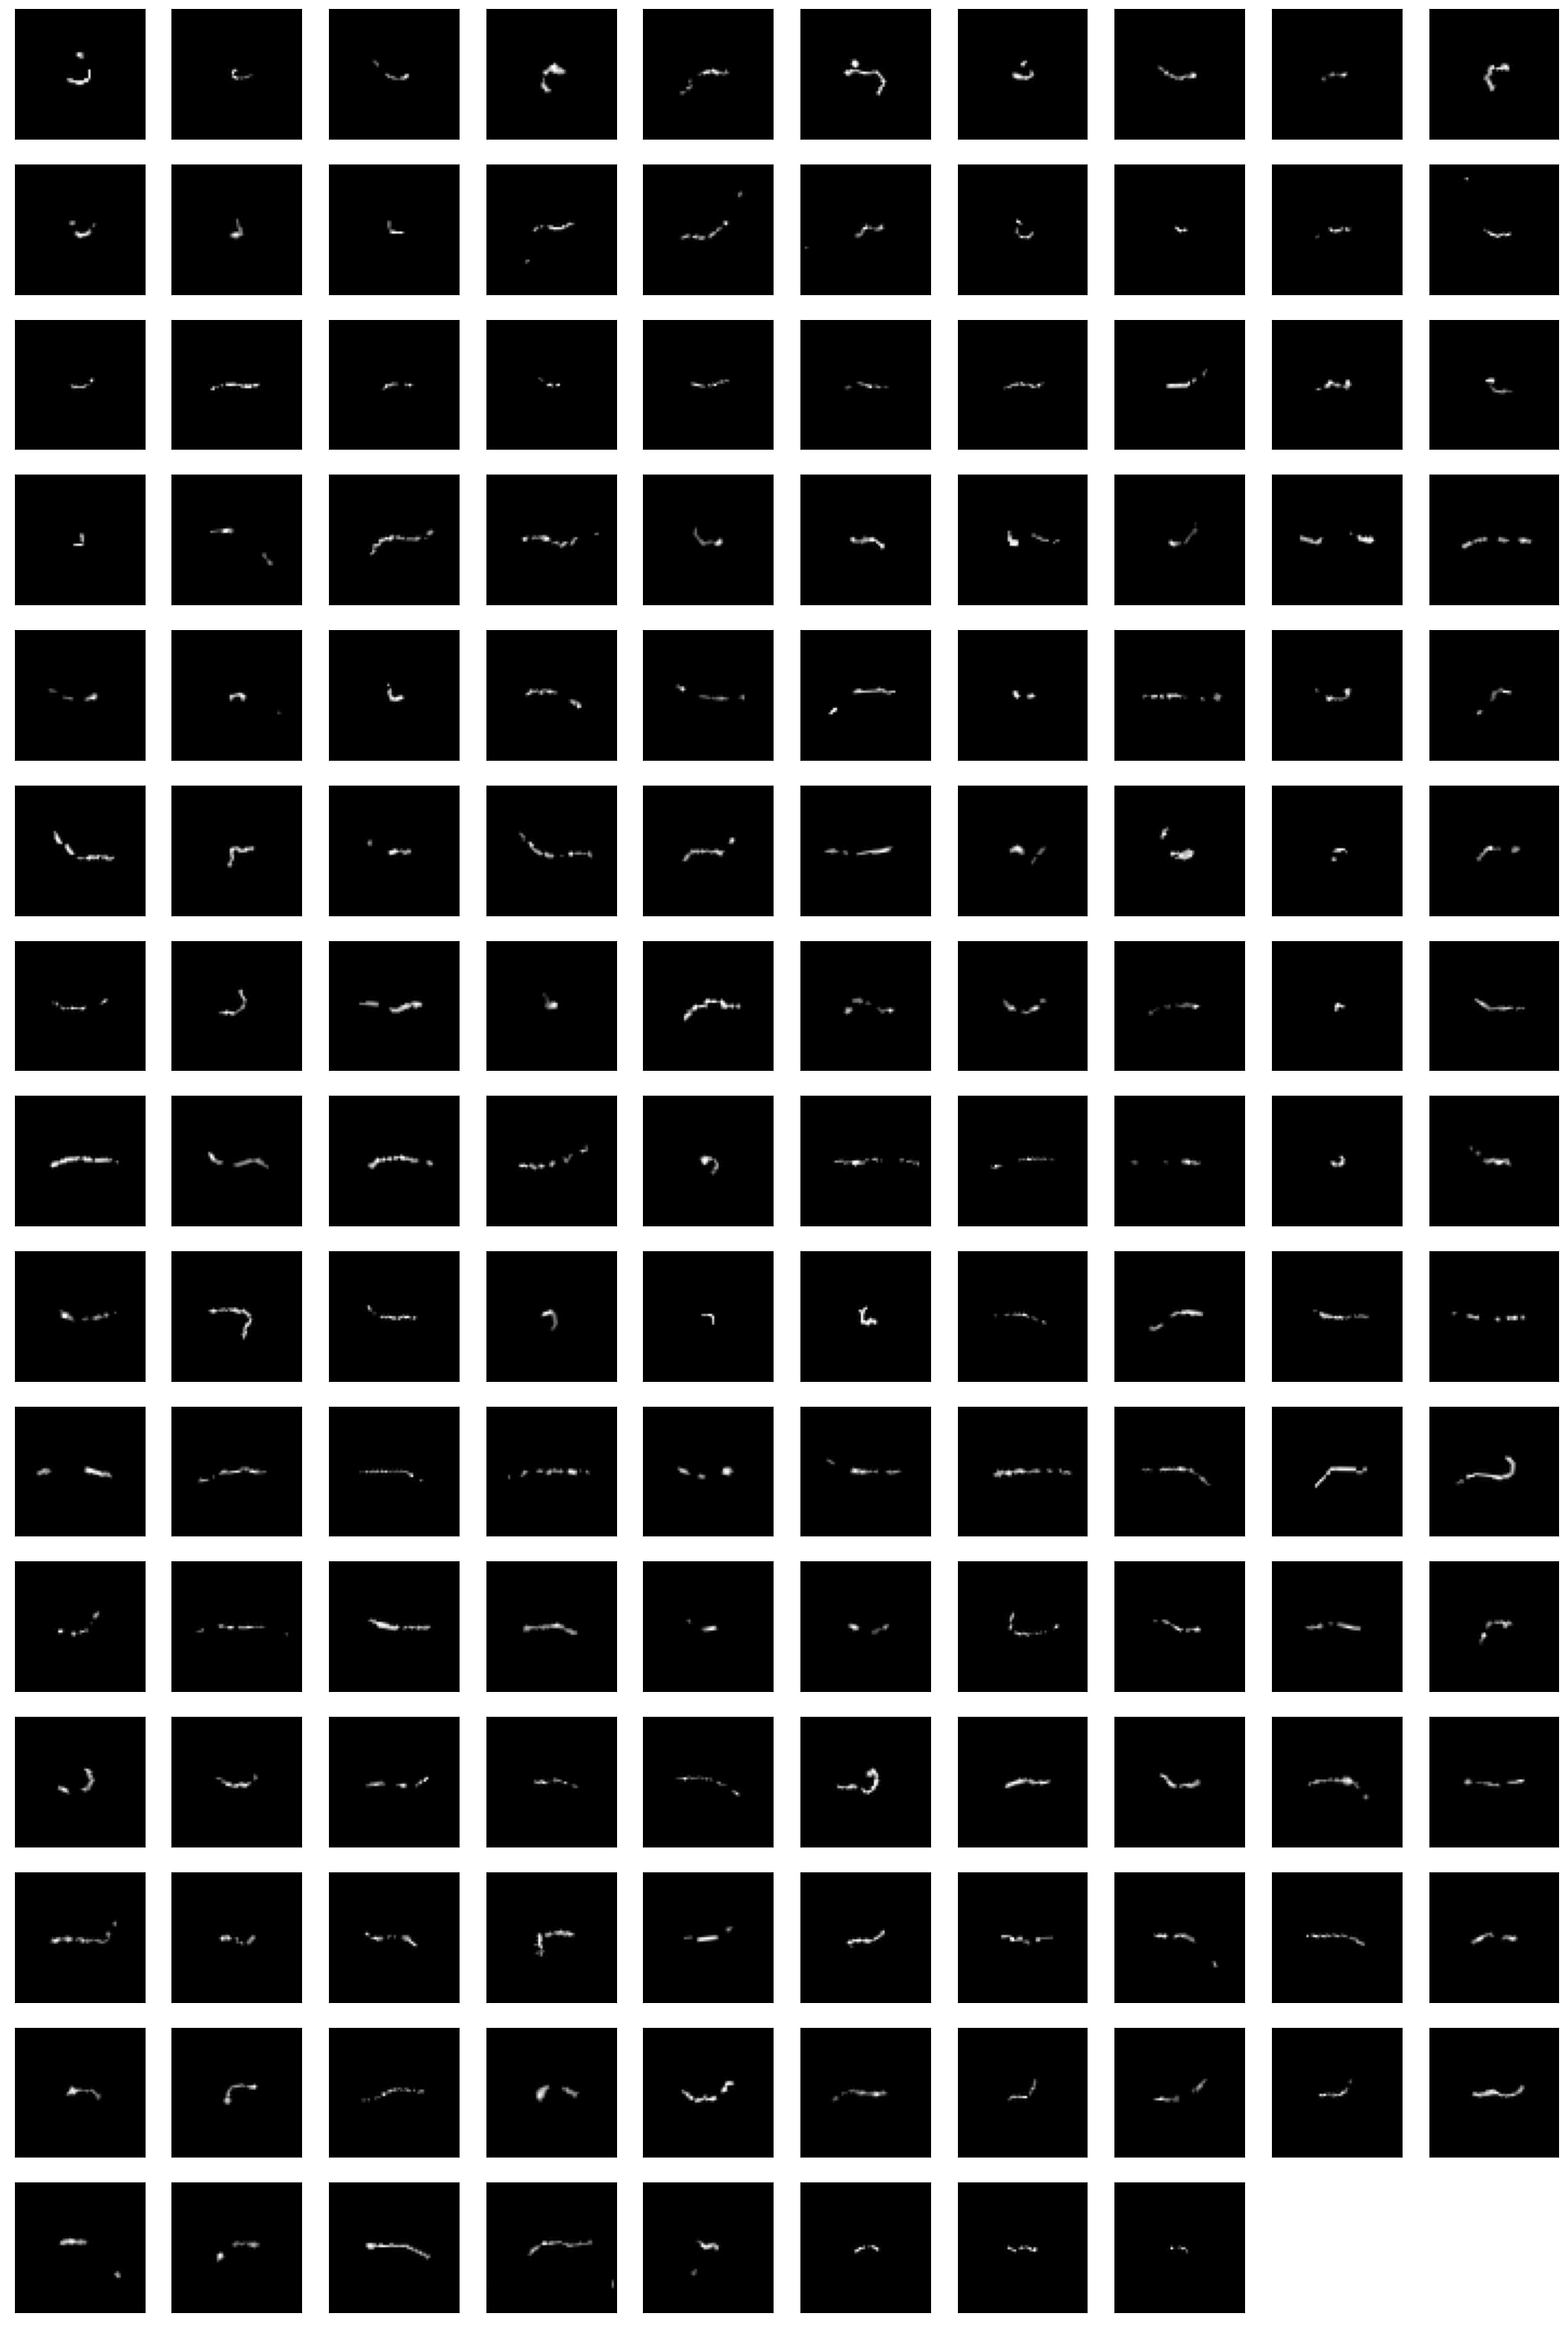

In [28]:
from functools import reduce
from credo import plot_images, normalize_rotation, normalize_translation
from collections import defaultdict

by_label = defaultdict(list)
for i, v in enumerate(clustering.labels_.tolist()):
    by_label[v].append(i)
to_sort = by_label.items()
sorted_clusters = sorted(to_sort, key=lambda x: len(x[1]))

outliers_tracks = []
outliers_worms = []
outliers_tracks_norm = []
outliers_worms_norm = []
for v, l in sorted_clusters:
    if len(l) > 1:
        break
    img = x_test[l[0]]
    n = normalize_rotation(img)
    n = normalize_translation(n)
    if y_test[l[0]] == 2:
        outliers_tracks.append(img)
        outliers_tracks_norm.append(n)
    else:
        outliers_worms.append(img)
        outliers_worms_norm.append(n)

tracks_count = reduce(lambda a, b: a+1 if b == 2 else a, y_test)
worms_count = len(x_test) - tracks_count

print('tracks %d z %d (%d %%)' % (len(outliers_tracks), tracks_count, len(outliers_tracks) * 100 / tracks_count))
plot_images(outliers_tracks, max_images=len(outliers_tracks))

print('worms %d z %d (%d %%)' % (len(outliers_worms), worms_count, len(outliers_worms) * 100 / worms_count))
plot_images(outliers_worms, max_images=len(outliers_worms))

print('tracks_norm')
plot_images(outliers_tracks_norm, max_images=len(outliers_tracks))

print('worms_norm')
plot_images(outliers_worms_norm, max_images=len(outliers_worms))